In [41]:
import mysql.connector
import time
import numpy as np
import matplotlib.pyplot as plt
import re

from numpy.ma.extras import average

from seeding_scripts import *

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password"
)
cursor = conn.cursor()

In [42]:
def plotter(datasets, test_id):
    markers = {0: '.', 1: 'x', 2: 'o', 3: '*', 4: 's'}
    colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple', 4: 'pink'}
    plt.figure(figsize=(10, 6))
    
    for index, dataset in enumerate(datasets):
        d = np.sort(dataset)
        c = np.arange(1, len(d) + 1) / len(d)
        label = "Control Dataset" if index == 0 else f"Dataset {index}"
        plt.plot(d, c, markers[index], color=colors[index], linewidth=1.5, markersize=4, label=label)
        print(f"The 50th percentile of {test_id} with {index} is " + str(np.percentile(d, 50)))
        print(f"The 99th percentile of {test_id} with {index} is " + str(np.percentile(d, 99)))

    plt.xlabel('Query Times')
    plt.ylabel('CDF')
    plt.title('Query Time CDF of ' + test_id)
    plt.grid()
    plt.legend()
    plt.xscale('log')
    plt.show()

In [ ]:
#########################################################
# NO OPTIMIZATION
#########################################################
setup_prod(cursor, conn)

# Test 1
test1_data = []
with open("../pit_delta.sql", "r") as pit_delta:
    pit_delta_template = pit_delta.read()

    pit_delta_template = re.sub(r'\bSELECT\b', 'SELECT SQL_NO_CACHE', pit_delta_template)
    pit_delta_template = pit_delta_template.format(raceID = 1039, driverID = 136)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(pit_delta_template)
        end_time = time.time()
        test1_data.append(end_time - start_time)
        cursor.fetchall()

In [ ]:
#########################################################
# WITH OPTIMIZATION 1
#########################################################
setup_prod_opt(cursor, conn, "optimization1.sql")

# Test 1
test1opt1_data = []
with open("../pit_delta.sql", "r") as pit_delta:
    pit_delta_template = pit_delta.read()

    pit_delta_template = re.sub(r'\bSELECT\b', 'SELECT SQL_NO_CACHE', pit_delta_template)
    pit_delta_template = pit_delta_template.format(raceID = 1039, driverID = 136)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(pit_delta_template)
        end_time = time.time()
        test1opt1_data.append(end_time - start_time)
        cursor.fetchall()

In [ ]:
#########################################################
# WITH OPTIMIZATION 2
#########################################################
setup_prod_opt(cursor, conn, "optimization2.sql")


# Test 1
test1opt2_data = []
with open("../pit_delta.sql", "r") as pit_delta:
    pit_delta_template = pit_delta.read()

    pit_delta_template = re.sub(r'\bSELECT\b', 'SELECT SQL_NO_CACHE', pit_delta_template)
    pit_delta_template = pit_delta_template.format(raceID = 1039, driverID = 136)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(pit_delta_template)
        end_time = time.time()
        test1opt2_data.append(end_time - start_time)
        cursor.fetchall()

In [ ]:
#########################################################
# WITH OPTIMIZATION 3
#########################################################
setup_prod_opt(cursor, conn, "optimization3.sql")


# Test 1
test1opt3_data = []
with open("../pit_delta.sql", "r") as pit_delta:
    pit_delta_template = pit_delta.read()

    pit_delta_template = re.sub(r'\bSELECT\b', 'SELECT SQL_NO_CACHE', pit_delta_template)
    pit_delta_template = pit_delta_template.format(raceID = 1039, driverID = 136)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(pit_delta_template)
        end_time = time.time()
        test1opt3_data.append(end_time - start_time)
        cursor.fetchall()

In [ ]:
#########################################################
# WITH OPTIMIZATION 4
#########################################################
setup_prod_opt(cursor, conn, "optimization4.sql")


# Test 1
test1opt4_data = []
with open("../pit_delta.sql", "r") as pit_delta:
    pit_delta_template = pit_delta.read()

    pit_delta_template = re.sub(r'\bSELECT\b', 'SELECT SQL_NO_CACHE', pit_delta_template)
    pit_delta_template = pit_delta_template.format(raceID = 1039, driverID = 136)
    for i in range (0, 500):
        start_time = time.time()
        cursor.execute(pit_delta_template)
        end_time = time.time()
        test1opt4_data.append(end_time - start_time)
        cursor.fetchall()

The 50th percentile of Test 1 with 0 is 0.00012111663818359375
The 99th percentile of Test 1 with 0 is 0.00035107135772705067
The 50th percentile of Test 1 with 1 is 0.00011682510375976562
The 99th percentile of Test 1 with 1 is 0.00024602174758911114
The 50th percentile of Test 1 with 2 is 0.0001404285430908203
The 99th percentile of Test 1 with 2 is 0.0002420759201049804
The 50th percentile of Test 1 with 3 is 0.0001399517059326172
The 99th percentile of Test 1 with 3 is 0.0003117966651916498
The 50th percentile of Test 1 with 4 is 0.0001169443130493164
The 99th percentile of Test 1 with 4 is 0.0002210235595703125


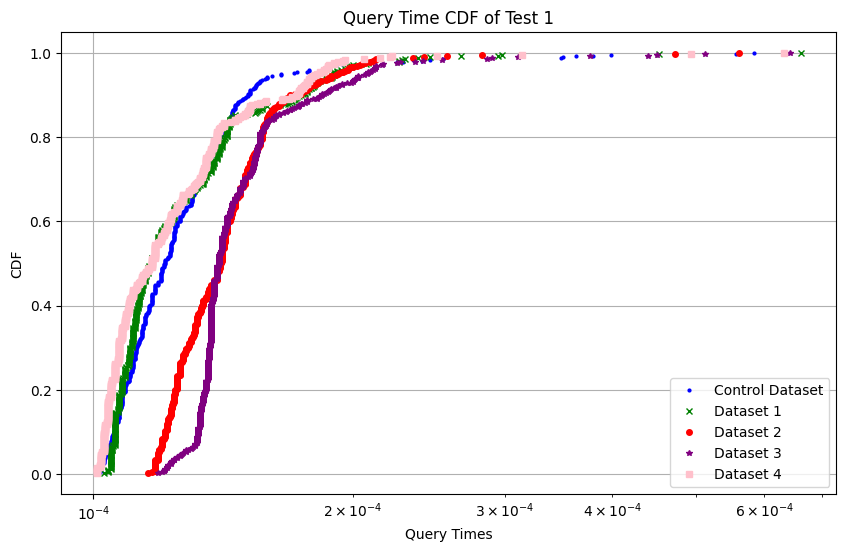

The 50th percentile of Test 2 with 0 is 0.00011491775512695312
The 99th percentile of Test 2 with 0 is 0.00021513223648071282
The 50th percentile of Test 2 with 1 is 0.00011801719665527344
The 99th percentile of Test 2 with 1 is 0.00014997720718383788
The 50th percentile of Test 2 with 2 is 0.00012993812561035156
The 99th percentile of Test 2 with 2 is 0.00016596078872680662
The 50th percentile of Test 2 with 3 is 0.00013685226440429688
The 99th percentile of Test 2 with 3 is 0.00017907381057739256
The 50th percentile of Test 2 with 4 is 0.00010895729064941406
The 99th percentile of Test 2 with 4 is 0.00014115333557128905


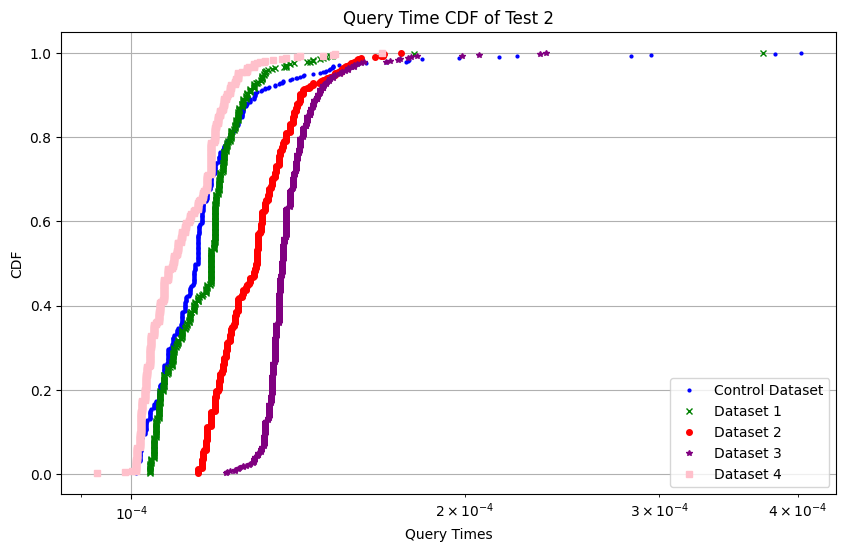

In [ ]:
#########################################################
# charts
#########################################################
plotter([test1_data, test1opt1_data, test1opt2_data, test1opt3_data, test1opt4_data], "Test 1")
